# Chapter 6: Simple vs. Optimal - The Power of Competition

We established that the **Optimal Auction** (using virtual valuations and specific reserve prices) beats the Standard Second-Price auction.

However, the Optimal Auction is **complex**. You need detailed market data to calculate the perfect reserve price. If you get it wrong, you lose money.

## The Bulow-Klemperer Theorem
In 1996, economists Bulow and Klemperer proved a shocking result that changed auction theory. They compared two scenarios:

1.  **The Genius:** You keep $N$ bidders and run the mathematically **Optimal Auction** (perfect reserve price).
2.  **The Hustler:** You run a simple **Second-Price Auction** (no reserve price), but you go out and find **one extra bidder** ($N+1$).

**The Theorem:**
> **The Simple Auction with $N+1$ bidders earns MORE revenue than the Optimal Auction with $N$ bidders.**

This teaches us a profound business lesson: **It is better to invest in marketing (finding more customers) than in market research (optimizing prices).** Competition is more powerful than complex math.

## Strategy 2: The Single Sample
What if you can't find more bidders? How do you set a reserve price without knowing the market distribution?
A simple trick is the **Single Sample** method:
1.  Take the first bidder's bid.
2.  Kick them out (sorry!).
3.  Use their bid as the **Reserve Price** for everyone else.

It sounds wasteful to kick someone out, but this method is proven to get a very good approximation of the optimal revenue.

Let's prove the Bulow-Klemperer Theorem with code.

--- The Bulow-Klemperer Theorem ---
Scenario 1: Optimal Auction (Complex) with N Bidders
Average Revenue: $67.32

Scenario 2: Simple Auction (Vickrey) with N+1 Bidders
Average Revenue: $71.31

Result: Simply adding 1 bidder beat the optimal math by $3.98 per auction!


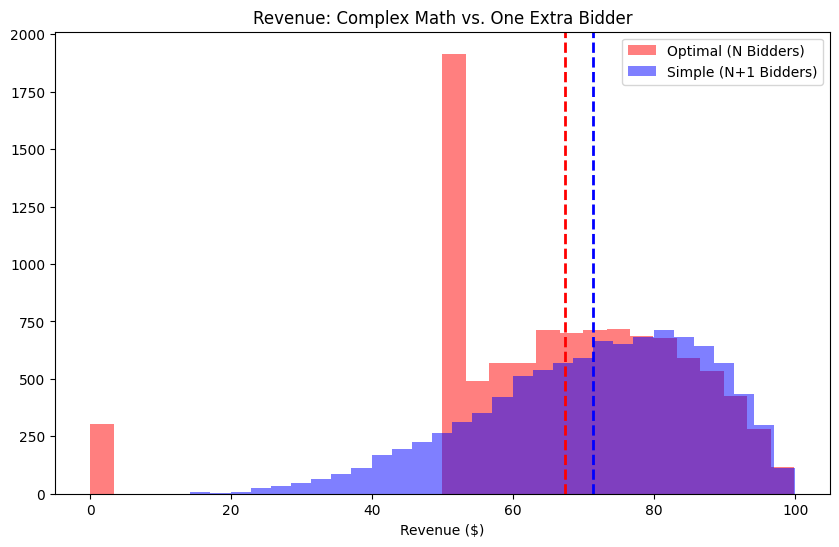

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def compare_auctions(num_simulations=10000):
    """
    Proves Bulow-Klemperer: 
    Simple Auction (N+1 Bidders) > Optimal Auction (N Bidders)
    """
    
    # PARAMETERS
    N = 5  # Number of bidders in the "Base" case
    # Valuation Distribution: Uniform [0, 100]
    # For U[0,100], the Optimal Reserve Price is mathematically calculated as $50.
    OPTIMAL_RESERVE = 50 
    
    rev_optimal_n = []
    rev_simple_n_plus_1 = []
    
    for _ in range(num_simulations):
        # --- SCENARIO 1: OPTIMAL AUCTION (N Bidders) ---
        # We have N bidders. We use the Perfect Reserve Price ($50).
        bids_n = np.random.uniform(0, 100, N)
        bids_n.sort() # Sort low to high
        
        # Logic:
        # 1. If highest bid < Reserve -> Revenue 0
        # 2. If highest > Reserve but 2nd highest < Reserve -> Revenue = Reserve
        # 3. If 2nd highest > Reserve -> Revenue = 2nd Highest
        
        highest = bids_n[-1]
        second = bids_n[-2]
        
        if highest < OPTIMAL_RESERVE:
            rev_optimal_n.append(0)
        elif second < OPTIMAL_RESERVE:
            rev_optimal_n.append(OPTIMAL_RESERVE)
        else:
            rev_optimal_n.append(second)
            
        # --- SCENARIO 2: SIMPLE AUCTION (N+1 Bidders) ---
        # We add 1 extra bidder. We use NO Reserve Price (Standard Vickrey).
        bids_plus = np.random.uniform(0, 100, N + 1)
        bids_plus.sort()
        
        # Revenue is simply the second highest bid
        rev_simple_n_plus_1.append(bids_plus[-2])
        
    return rev_optimal_n, rev_simple_n_plus_1

# --- RUN SIMULATION ---
rev_opt, rev_simp = compare_auctions()

avg_opt = np.mean(rev_opt)
avg_simp = np.mean(rev_simp)

print(f"--- The Bulow-Klemperer Theorem ---")
print(f"Scenario 1: Optimal Auction (Complex) with N Bidders")
print(f"Average Revenue: ${avg_opt:.2f}")
print(f"\nScenario 2: Simple Auction (Vickrey) with N+1 Bidders")
print(f"Average Revenue: ${avg_simp:.2f}")

diff = avg_simp - avg_opt
print(f"\nResult: Simply adding 1 bidder beat the optimal math by ${diff:.2f} per auction!")

# --- VISUALIZATION ---
plt.figure(figsize=(10, 6))
plt.hist(rev_opt, bins=30, alpha=0.5, label=f'Optimal (N Bidders)', color='red')
plt.hist(rev_simp, bins=30, alpha=0.5, label=f'Simple (N+1 Bidders)', color='blue')
plt.axvline(avg_opt, color='red', linestyle='--', linewidth=2)
plt.axvline(avg_simp, color='blue', linestyle='--', linewidth=2)
plt.title("Revenue: Complex Math vs. One Extra Bidder")
plt.xlabel("Revenue ($)")
plt.legend()
plt.show()

### Analysis

The simulation confirms the **Bulow-Klemperer Theorem**.

Even though Scenario 1 used the **perfect** mathematical reserve price (derived from Myerson's Lemma), it couldn't beat Scenario 2, which used **no math at all** but had just one extra participant.

**Key Takeaways for Mechanism Design:**
1.  **Market Thickness matters more than Market Design.** If you can get more people to show up, you don't need complex rules.
2.  **Robustness.** The Simple Auction works for *any* distribution. The Optimal Auction fails if you guessed the distribution wrong (e.g., if you thought the reserve should be \$50 but the market changed and it should be \$30).
3.  **Simplicity.** Simple auctions (like eBay's) are often preferred not just because they are easy to code, but because they are "Prior-Independent." They work well without knowing secret information about the bidders.